In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# 1 Dataset Exploration

## 1.1 Load the Boston Housing Dataset
In this notebook, we will be working with the Boston Housing dataset. This dataset contains information collected by the U.S Census Service concerning housing in Boston MA. It has been used extensively throughout the literature to benchmark algorithms and is also suitable for demonstration purposes due to its small size. The dataset contains 14 unique attributes, among which is the median value (price in $K) of a home for a given suburb. We will use this dataset as an example of how to develop a model that allows us to predict the median price of a home based on a single attribute in the dataset (average number of rooms in a house).  

Keras provides the `load_data()` function to load this dataset. Datasets are typically partitioned into `train`, and `test` components, and the `load_data()` function returns a tuple for each. Each tuple contains a 2-dimensional array of features (e.g., X_train) and a vector that contains the associated target values for each sample in the dataset (e.g., y_train). So, for example, the rows in `X_train` represent the various samples in the dataset and the columns represent the various features. In this notebook, we are only going to make use of the training data to demonstrate how to train a model. However, in practice, it is very important to use the test data to see how well the trained model performs on unseen data.

In [4]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


## 1.2 Extract Features from the Dataset

In this notebook we are only going to use a single feature from the dataset, so to keep things simple, we will store the feature data in a new variable.

In [5]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


## 1.3 Plot the Features
Here we plot the median price of a home vs. the single feature ('Average Number of Rooms').

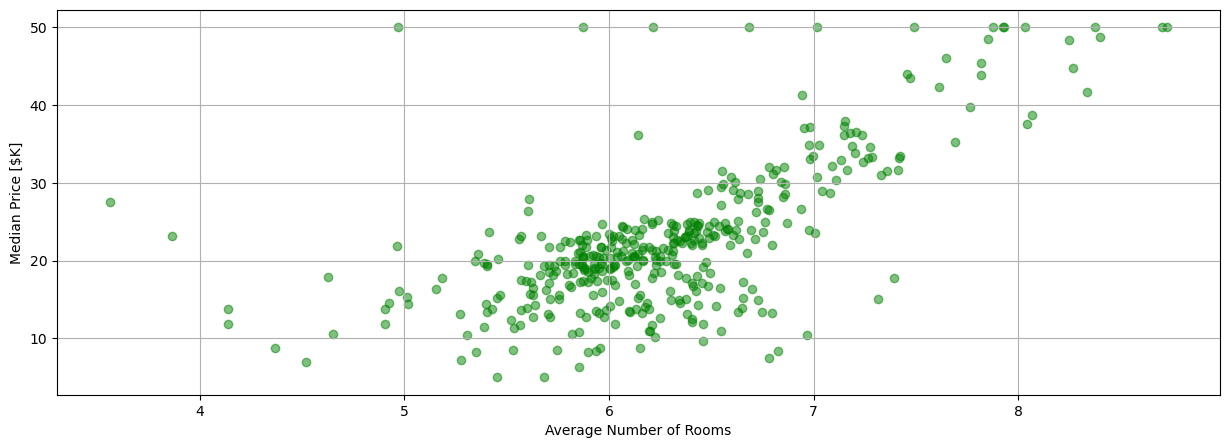

In [12]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

## 4 Modeling a Neural Network in Keras
The network diagram in the previous section represents the simplest possible neural network. The network has a single layer consisting of a single neuron that outputs $wx+b$. For every training sample, the predicted output $y'$ is compared to the actual value from the training data, and the loss is computed. The loss can then be used to fine-tune (update) the model parameters.

All of the details associated with training a neural network are taken care of by Keras as summarized in the following workflow:

1. Build/Define a network model using predefined layers in Keras.
2. Compile the model with `model.compile()`
3. Train the model with `model.fit()`
4. Predict the output `model.predict()`


### 4.1 Define the Keras Model

In [6]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


### 4.2 Compile the Model

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

### 4.3 Train the Model

In [8]:
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 [==============================] - 0s 8ms/step - loss: 490.3036 - val_loss: 558.1064
Epoch 2/101
18/18 [==============================] - 0s 3ms/step - loss: 460.1393 - val_loss: 529.2626
Epoch 3/101
18/18 [==============================] - 0s 3ms/step - loss: 434.4514 - val_loss: 502.4851
Epoch 4/101
18/18 [==============================] - 0s 2ms/step - loss: 410.1453 - val_loss: 476.4831
Epoch 5/101
18/18 [==============================] - 0s 2ms/step - loss: 386.3185 - val_loss: 450.8935
Epoch 6/101
18/18 [==============================] - 0s 3ms/step - loss: 363.3690 - val_loss: 426.5209
Epoch 7/101
18/18 [==============================] - 0s 3ms/step - loss: 341.4310 - val_loss: 402.7425
Epoch 8/101
18/18 [==============================] - 0s 3ms/step - loss: 320.4322 - val_loss: 380.4382
Epoch 9/101
18/18 [==============================] - 0s 3ms/step - loss: 300.2265 - val_loss: 358.4179
Epoch 10/101
18/18 [==============================] - 0s 3ms/step - loss:

### 4.4 Plot the Training Results

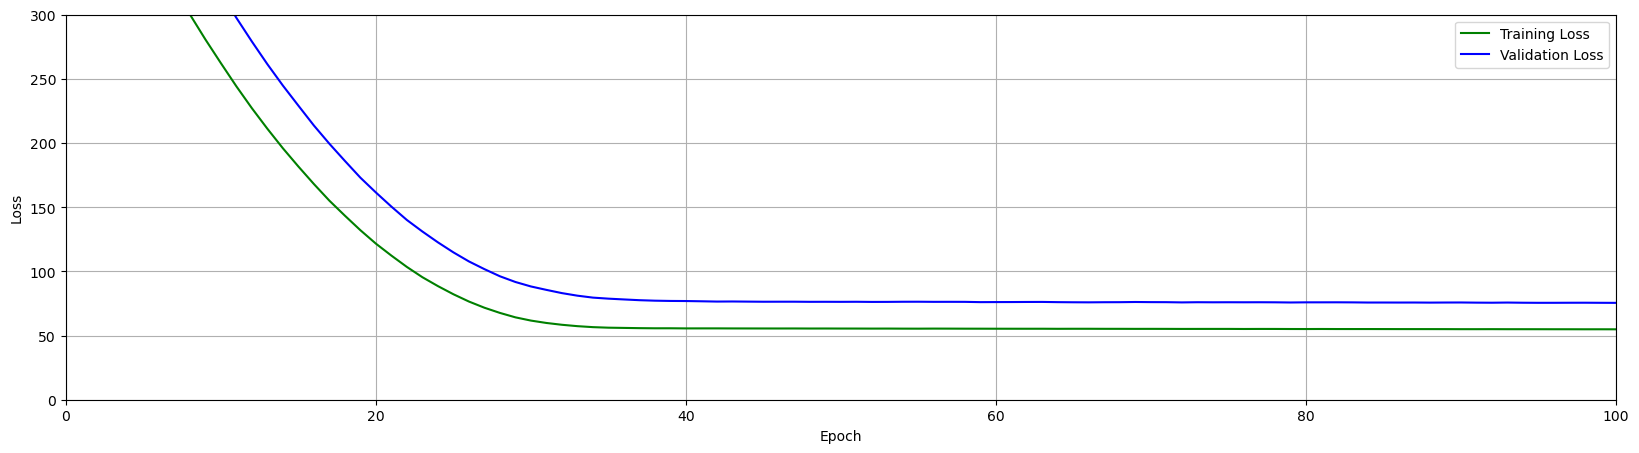

In [9]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

The loss curves above are fairly typical. First, notice that there are two curves, one for the training loss and one for the validation loss. Both are large initially and then steadily decrease and eventually level off with no further improvement after about 30 epochs. Since the model is only trained on the training data, it is also fairly typical that the training loss is lower than the validation loss.

### 4.4 Make Predictions using the Model

We can now use the `predict()` method in Keras to make a single prediction. In this example, we pass a list of values to the model (representing the average number of rooms), and the model returns the predicted value for the price of a home for each input.

In [10]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 [==============================] - 0s 67ms/step
Predicted price of a home with 3 rooms: $11.6K
Predicted price of a home with 4 rooms: $14.9K
Predicted price of a home with 5 rooms: $18.1K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.6K


C:\Users\Bridget Leonard\AppData\Local\Temp\ipykernel_12876\3429684607.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")


### 4.5 Plot the Model and the Data

1/1 [==============================] - 0s 49ms/step


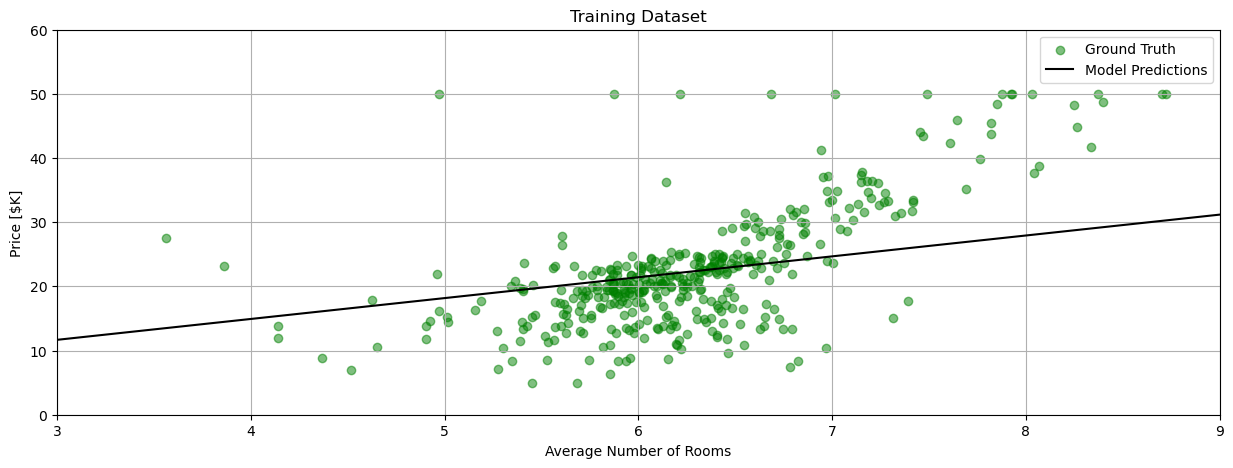

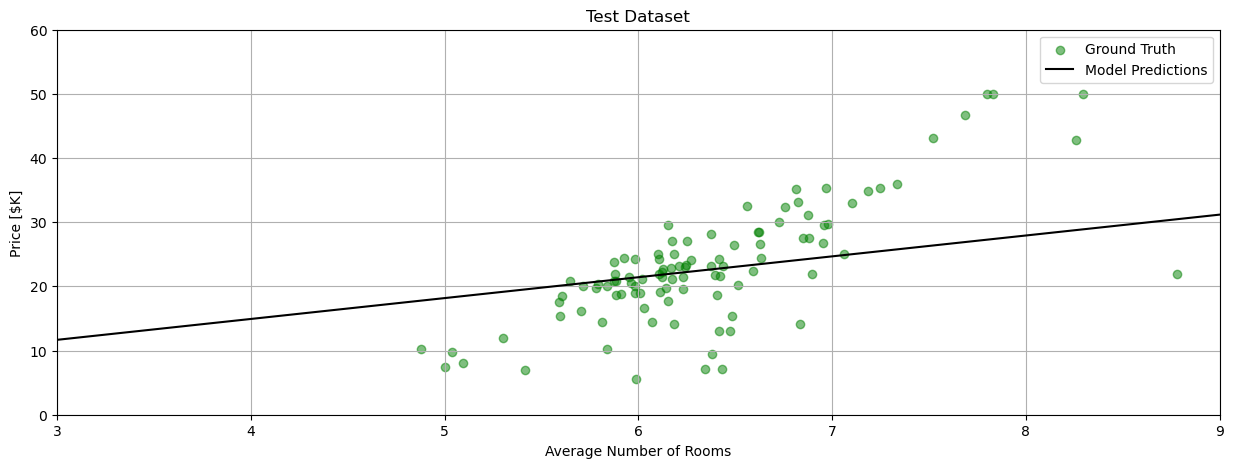

In [11]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

plot_data(X_test_1d, y_test, x, y, title='Test Dataset')

## 5 Conclusion

In this notebok, we introduced the topic of linear regression in the context of a simple neural network. We showed how Keras can be used to model and train the network to learn the parameters of the linear model and how to visualize the model predictions.